In [49]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from pandarallel import pandarallel
import regex as re
import glob
import os
pandarallel.initialize(progress_bar=True, nb_workers= 16, verbose = 0)
tqdm.pandas()

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import interpolate

In [51]:
import numpy as np
from scipy.ndimage import gaussian_filter1d

In [52]:
file_paths=[]
path = r'D:\GIT\Bachelor-Arbeit\notebooks\classifiers\poc\SGD\sgd_score_cvs' # path
print(path)
#file_paths = [f for f in os.listdir(path) if f.endswith('.csv')]
for file in  glob.glob(os.path.join(path , "*.csv")):
    file_paths.append(file)
print("loading from :",len(file_paths),"files")
while '.csv' in file_paths:
    file_paths.remove('.csv')
#safe all file names as cleaned keys
r = r"(.csv)|(D:\\GIT\\Bachelor-Arbeit\\notebooks\\classifiers\\poc\\SGD\\sgd_score_cvs\\F1_matrix_)"
subst = ""
file_keys=[]
for i in file_paths:
    names = re.sub(r, subst, i)
    file_keys.append(names)
while '' in file_keys:
    file_keys.remove('')
file_keys = map(int, file_keys)

D:\GIT\Bachelor-Arbeit\notebooks\classifiers\poc\SGD\sgd_score_cvs
loading from : 500 files


In [53]:
df = pd.concat(map(pd.read_csv,file_paths),keys=file_keys)

In [54]:
classes = ['Medizin','Landwirtschaft','Umweltwissenschaften','ErnÃ¤hrung']
macros = ["accuracy","macro avg","weighted avg"]

In [55]:
df.columns = ['Klassen', 'precision','recall','f1-score','Klassen-Support']
df.index.set_names(["size", "index"], inplace=True)
df = df.sort_index(level=['size'], ascending=[True])
df_sub60000 = df.head(1756)

In [56]:
df_classes_sub60k = df_sub60000.loc[df_sub60000['Klassen'].isin(classes)]

In [57]:
df_acc_macro_weigh_sub60k = df_sub60000.loc[df_sub60000['Klassen'].isin(macros)]

In [58]:
def smooth_graph(df, metrics, classes , simga):
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    for metric in tqdm(metrics):
        df[metric + "_smooth"] = ""
        for cla in classes:
            arr = df[metric].loc[df["Klassen"].str.contains(cla)]
            com_arr = df[metric]
            f1_m = gaussian_filter1d(arr, sigma=simga)
            f1_com = gaussian_filter1d(com_arr, sigma=simga)
            
            df[metric + "_smooth"].loc[df["Klassen"].str.contains(cla)] = f1_m
            df[metric + "_smooth_combined"] = f1_com
            print("done with smoothing " + metric +" and class: " + cla)
    warnings.simplefilter(action='default', category=FutureWarning)
    return df

    

In [59]:
simga=3
metrics = ['precision', 'recall', 'f1-score']
df_classes_sub60k = smooth_graph(df_classes_sub60k, metrics,classes, simga)
df_acc_macro_weigh_sub60k = smooth_graph(df_acc_macro_weigh_sub60k, metrics,macros, simga)

  0%|          | 0/3 [00:00<?, ?it/s]C:\Users\Keks\AppData\Local\Temp\ipykernel_26916\4047545863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[metric + "_smooth"] = ""
C:\Users\Keks\AppData\Local\Temp\ipykernel_26916\4047545863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[metric + "_smooth"].loc[df["Klassen"].str.contains(cla)] = f1_m
C:\Users\Keks\AppData\Local\Temp\ipykernel_26916\4047545863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

done with smoothing precision and class: Medizin
done with smoothing precision and class: Landwirtschaft
done with smoothing precision and class: Umweltwissenschaften
done with smoothing precision and class: ErnÃ¤hrung
done with smoothing recall and class: Medizin
done with smoothing recall and class: Landwirtschaft
done with smoothing recall and class: Umweltwissenschaften
done with smoothing recall and class: ErnÃ¤hrung
done with smoothing f1-score and class: Medizin
done with smoothing f1-score and class: Landwirtschaft
done with smoothing f1-score and class: Umweltwissenschaften
done with smoothing f1-score and class: ErnÃ¤hrung


  0%|          | 0/3 [00:00<?, ?it/s]C:\Users\Keks\AppData\Local\Temp\ipykernel_26916\4047545863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[metric + "_smooth"] = ""
C:\Users\Keks\AppData\Local\Temp\ipykernel_26916\4047545863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[metric + "_smooth"].loc[df["Klassen"].str.contains(cla)] = f1_m
C:\Users\Keks\AppData\Local\Temp\ipykernel_26916\4047545863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

done with smoothing precision and class: accuracy
done with smoothing precision and class: macro avg
done with smoothing precision and class: weighted avg
done with smoothing recall and class: accuracy
done with smoothing recall and class: macro avg
done with smoothing recall and class: weighted avg
done with smoothing f1-score and class: accuracy
done with smoothing f1-score and class: macro avg
done with smoothing f1-score and class: weighted avg


In [60]:
df_classes_sub60k['Klassen']=df_classes_sub60k['Klassen'].replace(r'Ã¤','ä', regex=True)

C:\Users\Keks\AppData\Local\Temp\ipykernel_26916\1309815304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_classes_sub60k['Klassen']=df_classes_sub60k['Klassen'].replace(r'Ã¤','ä', regex=True)


In [61]:
df_classes_sub60k

Klassen  precision    recall  f1-score  \
size  index                                                        
200   0                   Medizin   0.642857  0.750000  0.692308   
      1            Landwirtschaft   0.613636  0.613636  0.613636   
      2      Umweltwissenschaften   0.787234  0.637931  0.704762   
      3                 Ernährung   0.698113  0.740000  0.718447   
400   0                   Medizin   0.784091  0.638889  0.704082   
...                           ...        ...       ...       ...   
50000 3                 Ernährung   0.760648  0.876741  0.814579   
50200 0                   Medizin   0.771019  0.674059  0.719286   
      1            Landwirtschaft   0.753133  0.690861  0.720654   
      2      Umweltwissenschaften   0.742350  0.779058  0.760261   
      3                 Ernährung   0.757156  0.876978  0.812674   

             Klassen-Support precision_smooth  precision_smooth_combined  \
size  index                                                                
200   0                 48.0         0.726238                   0.689828   
      1                 44.0         0.682764                   0.694131   
      2                 58.0         0.737857                   0.701553   
      3                 50.0         0.741091                   0.710240   
400   0                108.0         0.727178                   0.718402   
...                      ...              ...                        ...   
50000 3               8616.0         0.758541                   0.756583   
50200 0               8612.0         0.779235                   0.756017   
      1               8611.0         0.744867                   0.755408   
      2               8595.0         0.743684                   0.754886   
      3               8657.0         0.758744                   0.754582   

            recall_smooth  recall_smooth_combined f1-score_smooth  \
size  index                                                         
200   0          0.688772                0.686243        0.702732   
      1          0.673196                0.688073        0.676748   
      2          0.715735                0.691782        0.723523   
      3          0.816593                0.697257        0.776822   
400   0          0.689832                0.704043        0.704004   
...                   ...                     ...             ...   
50000 3          0.876295                0.763572        0.813172   
50200 0           0.67532                0.767613        0.723553   
      1          0.690781                0.772347        0.716787   
      2          0.781577                0.776688        0.762157   
      3          0.876319                0.779314          0.8133   

             f1-score_smooth_combined  
size  index                            
200   0                      0.684567  
      1                      0.687620  
      2                      0.693166  
      3                      0.700231  
400   0                      0.707696  
...                               ...  
50000 3                      0.757788  
50200 0                      0.759494  
      1                      0.761522  
      2                      0.763401  
      3                      0.764544  

[1004 rows x 11 columns]

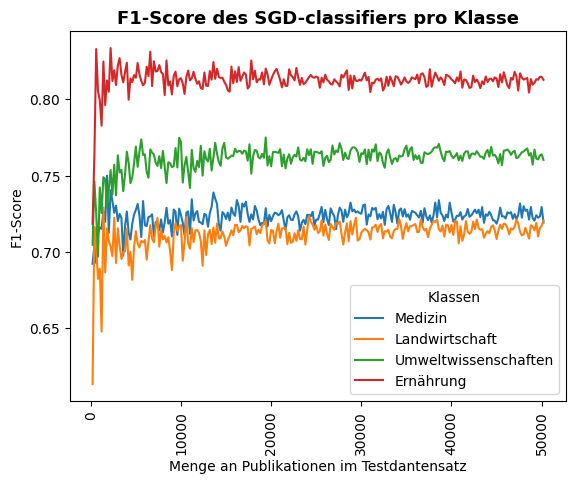

In [62]:
ax =  sns.lineplot(x='size', y='f1-score', hue='Klassen', 
                         data=df_classes_sub60k)
ax.set(xlabel="Menge an Publikationen im Testdantensatz",
       ylabel="F1-Score")
ax.text(x=0.5, y=1.01, s='F1-Score des SGD-classifiers pro Klasse',
        fontsize=13, weight='bold',
        ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.05, s="",
#        fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
ax.tick_params(axis='x', rotation=90)
fig = ax.get_figure()
fig.savefig("grafiken\\F1-Score_SGD.png",dpi=300, bbox_inches = "tight") 

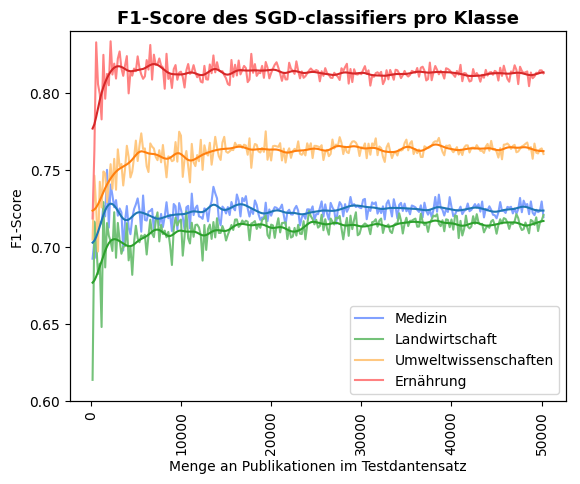

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)
palette = {
    'Medizin': 'tab:blue',
    'Landwirtschaft': 'tab:green',
    'Umweltwissenschaften': 'tab:orange',
    'Ernährung': 'tab:red',
}
palette1 = {
    'Medizin': '#81A1FF',
    'Landwirtschaft': '#74C279',
    'Umweltwissenschaften': '#FFC881',
    'Ernährung': '#FF8181',
}
ax =  sns.lineplot(x='size', y='f1-score', hue='Klassen', ax=ax,
                         data=df_classes_sub60k,palette=palette1)
ax.set(xlabel="Menge an Publikationen im Testdantensatz",
       ylabel="F1-Score")
ax.text(x=0.5, y=1.01, s='F1-Score des SGD-classifiers pro Klasse',
        fontsize=13, weight='bold',
        ha='center', va='bottom', transform=ax.transAxes)

ax2 = ax.twinx()
ax2 =  sns.lineplot(x='size', y='f1-score_smooth', hue='Klassen', 
                         data=df_classes_sub60k, ax=ax2,
                         palette=palette) 
ax2.set_ylabel(None)
a= 0.60
b= 0.84
n = 0
ax.set_ylim(a,b)
#ax.set_yticks(np.linspace(a,b,n))
ax2.set_ylim(a,b)
ax2.set_yticks(np.linspace(a,b,n))
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2 , labels, loc=4)
ax2.legend([], [], frameon=False)
#ax.text(x=0.5, y=1.05, s="",
#        fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
ax.tick_params(axis='x', rotation=90)
fig = ax.get_figure()
fig.savefig("grafiken\\F1-Score_SGD_smooth.png",dpi=300, bbox_inches = "tight") 




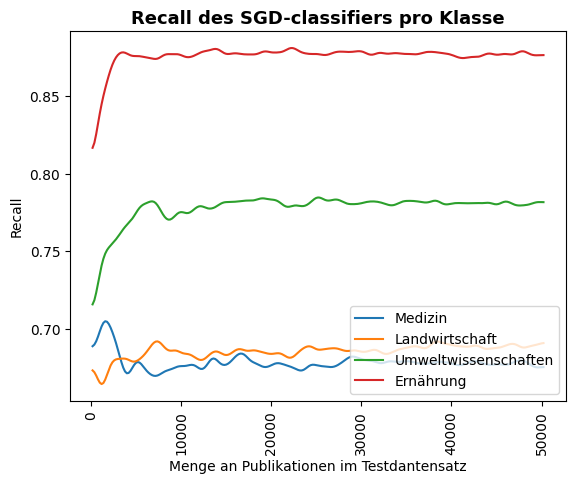

In [64]:
ax = sns.lineplot(x='size', y='recall_smooth', hue='Klassen', 
                         data=df_classes_sub60k)
ax.legend(loc=4)
ax.set(xlabel="Menge an Publikationen im Testdantensatz",
       ylabel="Recall")
ax.text(x=0.5, y=1.01, s='Recall des SGD-classifiers pro Klasse',
        fontsize=13, weight='bold',
        ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.05, s="",
#        fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
ax.tick_params(axis='x', rotation=90)
fig = ax.get_figure()
fig.savefig("grafiken\\Recall-Score_SGD_w_support.png",dpi=300, bbox_inches = "tight") 

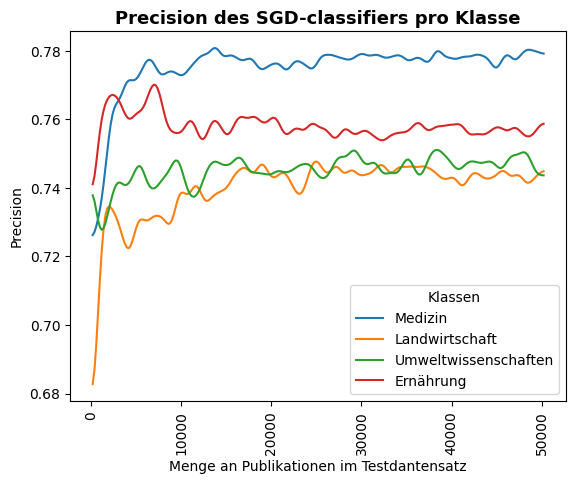

In [65]:
ax =   sns.lineplot(x='size', y='precision_smooth', hue='Klassen', 
                         data=df_classes_sub60k)
ax.set(xlabel="Menge an Publikationen im Testdantensatz",
       ylabel="Precision")
ax.text(x=0.5, y=1.01, s='Precision des SGD-classifiers pro Klasse',
        fontsize=13, weight='bold',
        ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.05, s="",
#        fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
ax.tick_params(axis='x', rotation=90)
fig = ax.get_figure()
fig.savefig("grafiken\\Precision-Score_SGD.png",dpi=300, bbox_inches = "tight") 

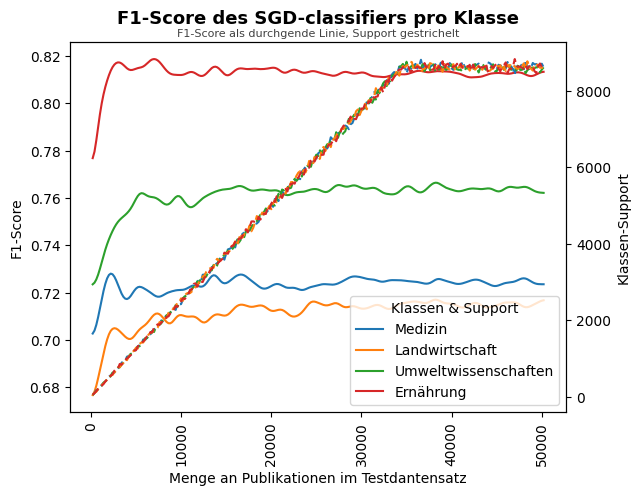

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
palette = {
    'Medizin': 'tab:blue',
    'Landwirtschaft': 'tab:green',
    'Umweltwissenschaften': 'tab:orange',
    'Ernährung': 'tab:red',
}

#subplt, ax = plt.subplots()
ax = sns.lineplot(x='size', y='f1-score_smooth', hue='Klassen', 
                         data=df_classes_sub60k , ax=ax)
ax2 = ax.twinx()
ax2 =  sns.lineplot(x='size', y='Klassen-Support', hue='Klassen',style="Klassen",
                         data=df_classes_sub60k, ax=ax2, dashes=[(4, 2), (4, 2), (4, 2), (4, 2)],
                         palette=palette)
ax.set(xlabel="Menge an Publikationen im Testdantensatz",
       ylabel="F1-Score")
ax.text(x=0.5, y=1.04, s='F1-Score des SGD-classifiers pro Klasse',
        fontsize=13, weight='bold',
        ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.01, s="F1-Score als durchgende Linie, Support gestrichelt",
        fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
ax.tick_params(axis='x', rotation=90)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2 , labels, loc=4, title="Klassen & Support")
ax2.legend([], [], frameon=False)
#fig = ax.get_figure()
#fig
fig.savefig("grafiken\\F1-Score_SGD_w_support.png",dpi=300, bbox_inches = "tight") 

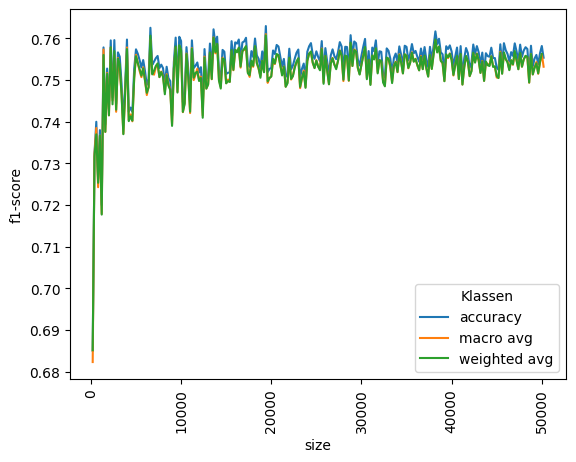

In [67]:
fg = sns.lineplot(x='size', y='f1-score', hue='Klassen', 
                         data=df_acc_macro_weigh_sub60k)
fg.tick_params(axis='x', rotation=90)


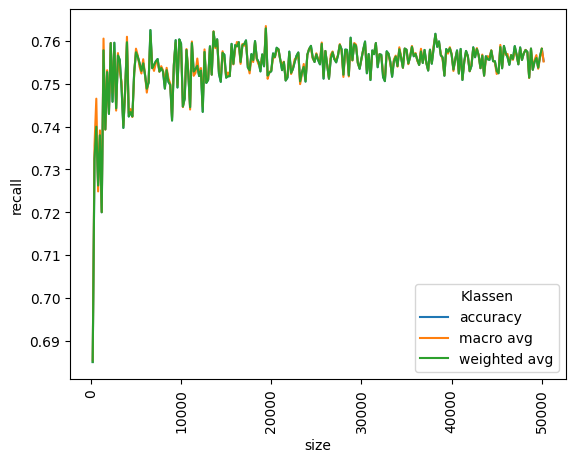

In [68]:
fg = sns.lineplot(x='size', y='recall', hue='Klassen', 
                         data=df_acc_macro_weigh_sub60k)
fg.tick_params(axis='x', rotation=90)

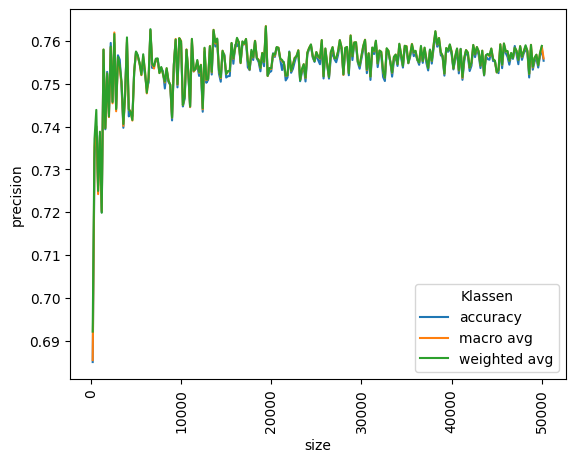

In [69]:
fg = sns.lineplot(x='size', y='precision', hue='Klassen', 
                         data=df_acc_macro_weigh_sub60k)
fg.tick_params(axis='x', rotation=90)